In [34]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [2]:
reviewlog = pd.read_csv('data/winemag-data-130k-v2.csv')

In [3]:
reviewlog

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [5]:
from nltk import WordNetLemmatizer
lemztr = WordNetLemmatizer()

In [6]:
lemztr.lemmatize('feet')

'foot'

In [14]:
example = reviewlog['description']

In [16]:
example = example.str.lower()

In [20]:
example = example.apply(lambda x: re.sub('\s+', ' ', x))

In [22]:
example = example.apply(lambda x: re.sub('[^\w\s]', '', x))

In [25]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
example = example.apply(lambda text: " ".join(word for word in text.split() if word not in stop))

In [26]:
example

0         aromas include tropical fruit broom brimstone ...
1         ripe fruity wine smooth still structured firm ...
2         tart snappy flavors lime flesh rind dominate g...
3         pineapple rind lemon pith orange blossom start...
4         much like regular bottling 2012 comes across r...
                                ...                        
129966    notes honeysuckle cantaloupe sweeten delicious...
129967    citation given much decade bottle age prior re...
129968    welldrained gravel soil gives wine crisp dry c...
129969    dry style pinot gris crisp acidity also weight...
129970    big rich offdry powered intense spiciness roun...
Name: description, Length: 129971, dtype: object

In [35]:
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
wc.generate(' '.join(example))

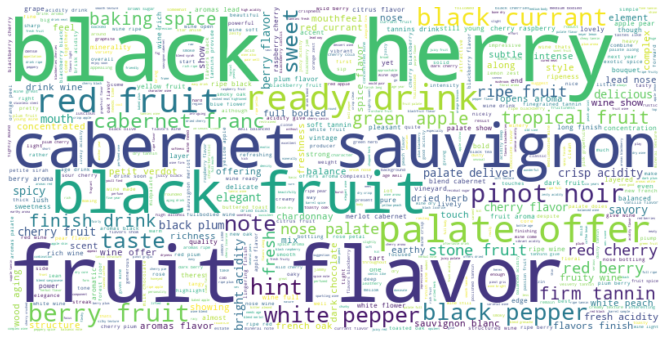

In [36]:
# show
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()